In [1]:
import os

import pandas as pd 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [47]:
GRACE_path = "/home/kmk58/GRACE/"
GRACE_folders = os.listdir("/home/kmk58/GRACE/")
#print(GRACE_folders)

GRACE_paths_all = [GRACE_path + f for f in GRACE_folders]
#print(GRACE_paths_all)
file_GRACE=[]
for folder in GRACE_paths_all:
    for filename in os.listdir(folder):
        if filename.endswith(".nc"):
            file_GRACE.append(folder+'/'+str(filename))
           # print(file_GRACE)
        
            # df1_subset = df1.sel(lat=slice(30,40), lon=slice(270,280))
            # mean_lwe = df1_subset['lwe_thickness'].values.mean()*100 #IN CENTIMETERS
            # date = df1_subset['time'].values[0]
            # print(dict_grace)
list_grace=[]
data=pd.DataFrame()

for filename in file_GRACE:
    df1 = xr.open_dataset(filename)
    df1_subset = df1.sel(lat=slice(30,40), lon=slice(270,280))
    mean_lwe = df1_subset['lwe_thickness'].values.mean()*100 #IN CENTIMETERS
    date = pd.to_datetime(df1_subset['time'].values[0])
    if "CSR" in filename: 
        center="CSR"
    elif "JPL" in filename: 
        center="JPL"
    else: 
        center="GFZ"
    list_df = [date,center,mean_lwe]
    list_grace.append(list_df)
    
df_grace = pd.DataFrame(list_grace, columns=['Date', "Center", "Mean"])










In [48]:
df_grace

,Date,Center,Mean
0,2017-06-10 12:00:00,CSR,6.838791
1,2017-05-13 00:00:00,CSR,6.384436
2,2017-04-24 12:00:00,CSR,5.366836
3,2017-03-31 12:00:00,CSR,7.785213
4,2017-01-21 00:00:00,CSR,5.426492
...,...,...,...
652,2018-12-16 12:00:00,JPL,9.356320
653,2018-11-16 00:00:00,JPL,4.829458
654,2018-10-31 12:00:00,JPL,1.533209
655,2018-07-10 00:00:00,JPL,-0.153886


In [19]:
GRACE_folders
GRACE_paths_all

    #date = pd.to_datetime(str(date)).strftime('%Y.%m.%d')
"""     dict_grace[date] = mean_lwe
            print(folder+'/'+filename)
            if "JPL" in filename: 
                print("JPL")
            elif "CSR" in filename:
                print("CSR")
            else: 
                print("GFZ") 
                
                
                            df1 = xr.open_dataset(GRACE_path+"/"+str(filename)) 
            df1_subset = df1.sel(lat=slice(30,40), lon=slice(270,280))
            mean_lwe = df1_subset['lwe_thickness'].values.mean()*100 #IN CENTIMETERS
            date = df1_subset['time'].values[0]"""
    
    
    
    
   # GRACE_temp_dir = os.listdir(folder)
   # test = [GRACE_path + folder for folder in GRACE_folders]
    #GRACE_files = filter(lambda file: file.endswith(".nc"), GRACE_files)
    #GRACE_files = [GRACE_path + x for x in GRACE_files]
   # print(folder)
   # print(test)

# GRACE_FO_path = "/home/kmk58/remoteData/GRACEFO/"
# GRACE_FO_files = os.listdir(GRACE_FO_path)
# GRACE_FO_path_nc = filter(lambda file: file.endswith(".nc"), GRACE_FO_files)
# GRACE_FO_files = [GRACE_FO_path + x for x in GRACE_FO_path_nc]
# print(GRACE_FO_files)

['/home/kmk58/GRACE//TELLUS_GRAC_L3_CSR_RL06_LND_v04',
 '/home/kmk58/GRACE//TELLUS_GRFO_L3_CSR_RL06.1_LND_v04',
 '/home/kmk58/GRACE//TELLUS_GRAC_L3_GFZ_RL06_LND_v04',
 '/home/kmk58/GRACE//TELLUS_GRFO_L3_GFZ_RL06.1_LND_v04',
 '/home/kmk58/GRACE//TELLUS_GRAC_L3_JPL_RL06_LND_v04',
 '/home/kmk58/GRACE//TELLUS_GRFO_L3_JPL_RL06.1_LND_v04']

In [23]:
[GRACE_path + f for f in GRACE_folders]

['/home/kmk58/remoteData/GRACE_NEW2/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/TELLUS_GRFO_L3_GFZ_RL06.1_LND_v04',
 '/home/kmk58/remoteData/GRACE_NEW2/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/TELLUS_GRAC_L3_CSR_RL06_LND_v04',
 '/home/kmk58/remoteData/GRACE_NEW2/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/TELLUS_GRFO_L3_CSR_RL06.1_LND_v04',
 '/home/kmk58/remoteData/GRACE_NEW2/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/TELLUS_GRAC_L3_GFZ_RL06_LND_v04',
 '/home/kmk58/remoteData/GRACE_NEW2/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/TELLUS_GRAC_L3_JPL_RL06_LND_v04',
 '/home/kmk58/remoteData/GRACE_NEW2/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/TELLUS_GRFO_L3_JPL_RL06.1_LND_v04']

In [6]:
dict_grace = {}

for filename in list(reversed(GRACE_FO_files)) + GRACE_files:
    df1 = xr.open_dataset(filename) 
    df1_subset = df1.sel(lat=slice(30,40), lon=slice(270,280))
    mean_lwe = df1_subset['lwe_thickness'].values.mean()*100 #IN CENTIMETERS
    date = df1_subset['time'].values[0]
    #date = pd.to_datetime(str(date)).strftime('%Y.%m.%d')
    dict_grace[date] = mean_lwe
    print(dict_grace)

/home/kmk58/.local/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


/tmp/ipykernel_8280/529925353.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)


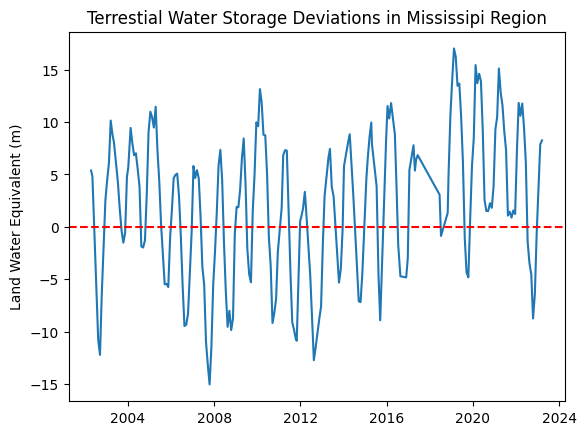

In [20]:
lists = sorted(dict_grace.items())

x, y = zip(*lists)
plt.plot(x,y)
#plt.xticks(x, [str(i) for i in y], rotation=90)
#plt.tick_params(axis='x', which='major', labelsize=3)
plt.locator_params(axis='x', nbins=10) 
plt.title("Terrestial Water Storage Deviations in Mississipi Region")
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Land Water Equivalent (m)")
plt.show()

#df = pd.DataFrame.from_dict(dict_grace, orient='index')
#df